In [2]:
import pathlib
path=str(pathlib.Path().resolve().parent)+"/imagenes/"

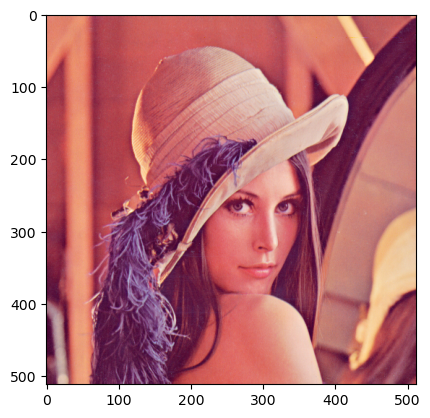

In [3]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
src = cv.imread(path + "test.png")
# Lo mostramos en los tres canales
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)

plt.imshow(src)

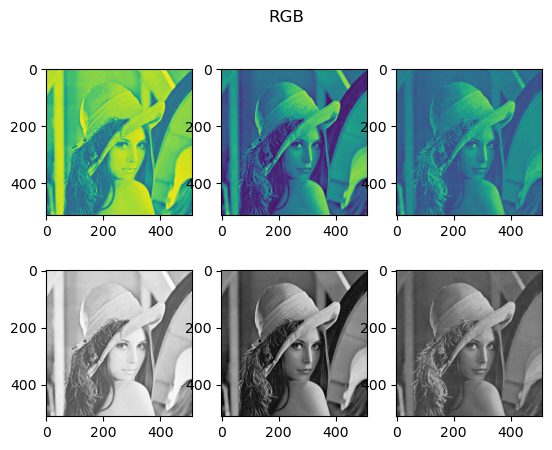

In [21]:
fig,axs = plt.subplots(2,3)
fig.suptitle("R-G-B")
# Determina que el valor sea de 0 a 255 de valores que no acorte
# Rojo
axs[0][0].imshow(src[:,:,0],vmin=0,vmax=255)
# Verde
axs[0][1].imshow(src[:,:,1],vmin=0,vmax=255)
# Azul
axs[0][2].imshow(src[:,:,2],vmin=0,vmax=255)

axs[1][0].imshow(src[:,:,0],cmap="gray",vmin=0,vmax=255)
axs[1][1].imshow(src[:,:,1],cmap="gray",vmin=0,vmax=255)
axs[1][2].imshow(src[:,:,2],cmap="gray",vmin=0,vmax=255)

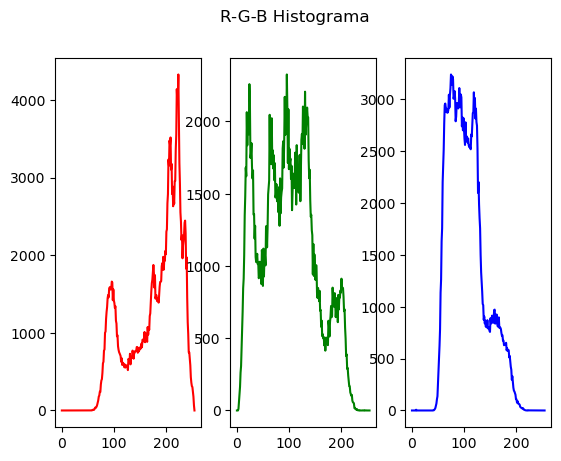

In [28]:
fig,axs = plt.subplots(1,3)
fig.suptitle("R-G-B Histograma")
# Imagen, canal, máscara, tamaño (PQ ES DEL 0-255), Y EL MÁRGEN DE COLOR, esto nos dará el histograma
axs[0].plot(cv.calcHist([src],[0],None,[256],[0,255]),color="red")
axs[1].plot(cv.calcHist([src],[1],None,[256],[0,255]),color="green")
axs[2].plot(cv.calcHist([src],[2],None,[256],[0,255]),color="blue")

·Vemos que las partes que hay rojas son muy rojos y luminosos por encima de 100, también hay gran cantidad de rojo llegando a 4000

·Vemos que el verde está en zonas menos luminosas y hay una cantidad menor en comparación con los otros

·En cambio el azul estña en zonas de iluminación media pero están concentrados y hay menor cantidad que el rojo y mayor que el verde

# **Ecualizar el histograma es anchear los colores, para que destaquen más**

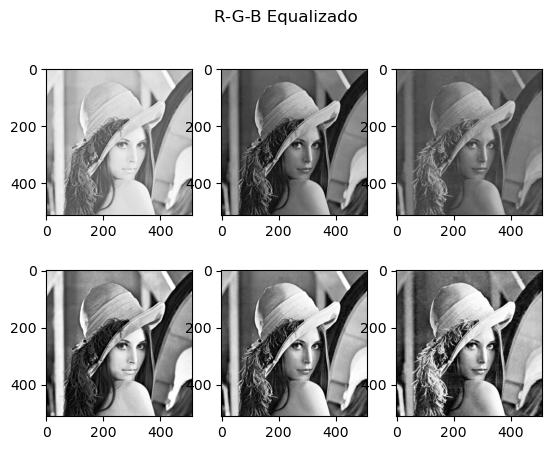

In [34]:
fig,axs = plt.subplots(2,3)
fig.suptitle("R-G-B Equalizado")

axs[0][0].imshow(src[:,:,0],cmap="gray",vmin=0,vmax=255)
axs[0][1].imshow(src[:,:,1],cmap="gray",vmin=0,vmax=255)
axs[0][2].imshow(src[:,:,2],cmap="gray",vmin=0,vmax=255)

axs[1][0].imshow(cv.equalizeHist(src[:,:,0]),cmap="gray",vmin=0,vmax=255)
axs[1][1].imshow(cv.equalizeHist(src[:,:,1]),cmap="gray",vmin=0,vmax=255)
axs[1][2].imshow(cv.equalizeHist(src[:,:,2]),cmap="gray",vmin=0,vmax=255)

In [35]:
merged = cv.merge([cv.equalizeHist(src[:,:,0]),cv.equalizeHist(src[:,:,1]),cv.equalizeHist(src[:,:,2])])

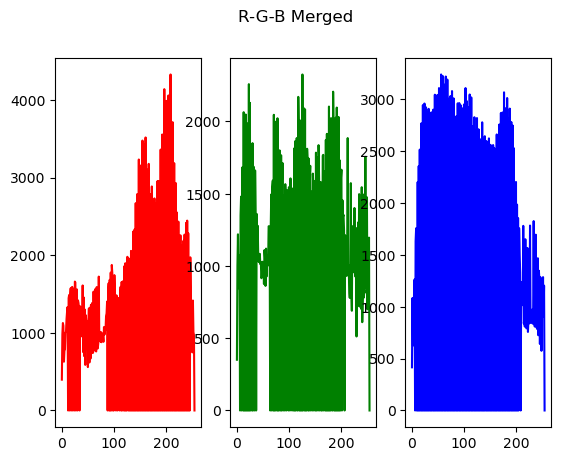

In [40]:
fig,axs = plt.subplots(1,3)
fig.suptitle("R-G-B Merged")

axs[0].plot(cv.calcHist([merged],[0],None,[256],[0,255]),color="red")
axs[1].plot(cv.calcHist([merged],[1],None,[256],[0,255]),color="green")
axs[2].plot(cv.calcHist([merged],[2],None,[256],[0,255]),color="blue")

Vemos que está un poco más equitativo en temas de pixeles en comparación a la imagen anterior

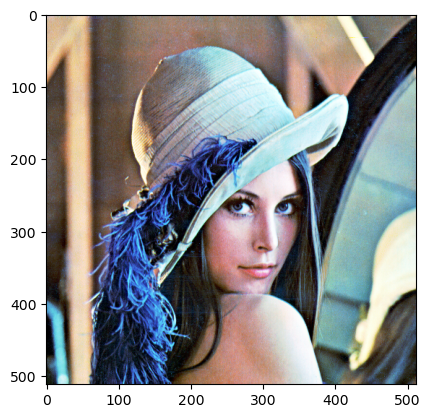

In [42]:
# Vemos que la imagen ahora gana un equilibrio de colores
plt.imshow(merged)